In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

# Q4

In [3]:
#Looking for top answers 
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
# looking at bottom 5
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# Q5

In [5]:
# How many rows and columns are in gdp_df? 
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## answer:  7662 rows; 4 columns

In [6]:
#What are the data types of each column?

## answer: object, int64, float64, float64

## Q6

In [7]:
#Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df =gdp_df.drop(columns = 'Value Footnotes', axis = 1)

In [9]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

## answer:

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


## Q7

In [11]:
gdp_df.count()

Country           7662
Year              7662
GDP_Per_Capita    7662
dtype: int64

In [12]:
gdp_country_yrcount = gdp_df.groupby (['Country'], as_index=False)['Year'].count()

In [13]:
#How many countries have data for all years?
gdp_country_yrcount[(gdp_country_yrcount['Year'] >= 33)]

,Country,Year
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
5,Angola,33
...,...,...
236,Vanuatu,33
237,Viet Nam,33
239,World,33
240,Zambia,33


# answer: 202 

In [14]:
gdp_country_yrcount[(gdp_country_yrcount['Year'] < 33)].count()

Country    40
Year       40
dtype: int64

# answer:

In [15]:
#Which countries are missing many years of data? 
gdp_country_yrcount[(gdp_country_yrcount['Year'] < 33)]

,Country,Year
0,Afghanistan,20
10,Aruba,32
22,Bhutan,32
24,Bosnia and Herzegovina,29
32,Cambodia,30
36,Cayman Islands,16
46,Croatia,28
47,CuraÃ§ao,22
53,Djibouti,10
64,Estonia,28


In [16]:
#Look at the number of observations per year. What do you notice?

## Q8

In [17]:
gdp_2020 = gdp_df[(gdp_df['Year'] == 2020)]

In [18]:
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


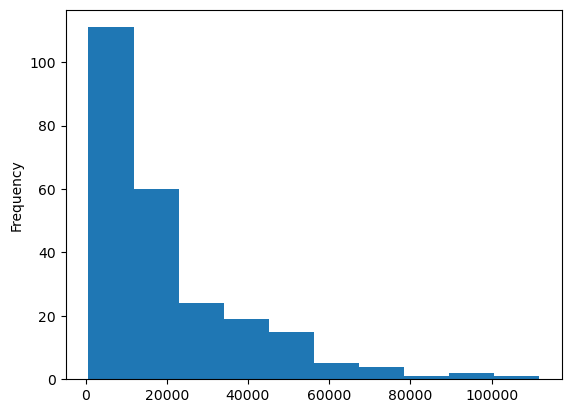

In [19]:
gdp_2020 ['GDP_Per_Capita'].plot(kind='hist')
plt.show()

<Axes: ylabel='Density'>

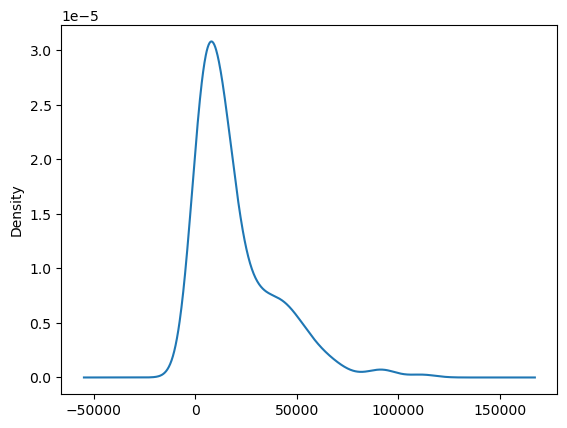

In [20]:
gdp_2020['GDP_Per_Capita'].plot.density()

<Axes: xlabel='Country', ylabel='GDP_Per_Capita'>

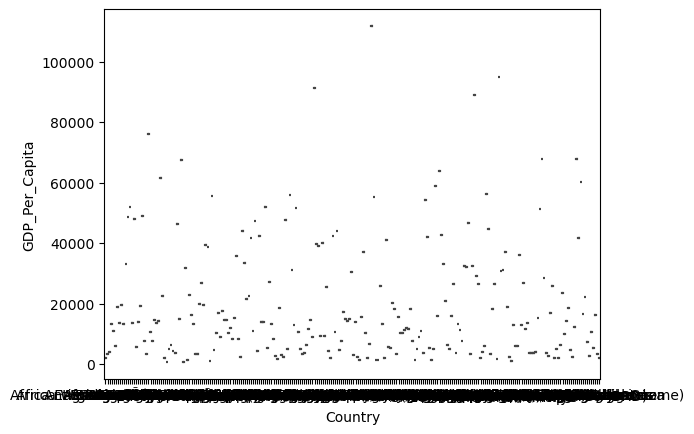

In [21]:
sns.boxplot( x=gdp_2020["Country"], y=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='Country', ylabel='GDP_Per_Capita'>

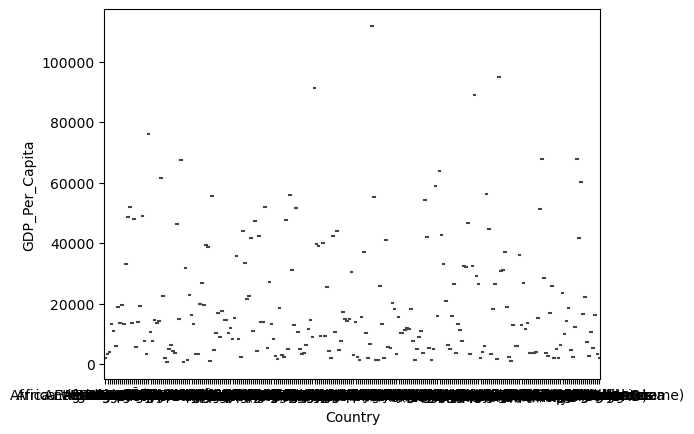

In [22]:
sns.violinplot(x=gdp_2020["Country"], y=gdp_2020["GDP_Per_Capita"])

## Q9

In [23]:
##What was the median GDP per capita value in 2020?
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

## Answer: 13357.997573370474


## Q10

In [24]:
##For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

## Q11 

In [25]:
##Which country was the first to have a GDP per capita greater than $100,000?
gdp_df[(gdp_df['GDP_Per_Capita'] > 100000)].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


## Answer: United Arab Emirates 1990

## Q12

In [26]:
##Which country had the highest GDP per capita in 2020? 
##Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
gdp_2020.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


## Q13

In [27]:
##Which country had the lowest GDP per capita in 2020? 
gdp_2020.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


## Q14

In [28]:
internet_df = pd.read_csv('../data/internet_use.csv', engine='python', skipfooter= 180,  on_bad_lines= 'skip')

In [29]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


## Q15

In [30]:
##Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df =internet_df.drop(columns = 'Value Footnotes', axis = 1) .rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [32]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


## Q16

In [33]:
##Look at the number of observations in this dataset per year. What do you notice?
internet_df.groupby (['Year'], as_index=False)['Internet_Users_Pct'].sum()

,Year,Internet_Users_Pct
0,1960,0.000000
1,1965,0.000000
2,1970,0.000000
3,1975,0.000000
4,1976,0.000000
5,1977,0.000000
6,1978,0.000000
7,1979,0.000000
8,1980,0.000000
9,1981,0.000000


# answer: from 19060 - 1989 there was no users and then througout the years after there was a gradual increase, in 1993 the internet was made public and you can see it grew largely since then. 

## Q17

In [34]:
##What is the first year to have a non-zero internet users percentage value?


## answer: 1990

## Q18

In [ ]:
##How does the distribution of internet users percent differ for 2000 and 2014?


## answer: there was a major increase about 8 times of 2000 for 2014 

## Q19

In [39]:
##For how many countries was the percentage of internet users below 5% in 2014?
internet_df_2014 = internet_df[(internet_df['Year'] == 2014)]

In [40]:
internet_df_2014[(internet_df_2014['Internet_Users_Pct'] < 5)].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

## answer: 16

## Q20

In [ ]:
## Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. 
##Look at the first and last few rows to confirm that it merged correctly.